# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:\\Users\\Owner\\Documents\\Data Science Bootcamp\\Homework\\city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
print(cities)

['mecca', 'labuhan', 'jamestown', 'kapaa', 'busselton', 'qaanaaq', 'cape town', 'punta arenas', 'te anau', 'khandyga', 'mar del plata', 'rikitea', 'hermanus', 'kodiak', 'solnechnyy', 'calubcub', 'acarau', 'castro', 'illoqqortoormiut', 'vaini', 'jenesano', 'ambilobe', 'pasni', 'new norfolk', 'dikson', 'nyurba', 'yellowknife', 'jijiga', 'boa vista', 'alta floresta', 'mount isa', 'jalu', 'toliary', 'mehamn', 'ati', 'chuy', 'luganville', 'vanavara', 'puerto ayora', 'lebu', 'saint-philippe', 'bredasdorp', 'sosnovo-ozerskoye', 'buala', 'port alfred', 'hilo', 'tuktoyaktuk', 'georgetown', 'caravelas', 'wolow', 'mikhaylovskoye', 'flinders', 'arraial do cabo', 'college', 'kloulklubed', 'minas', 'sabang', 'east london', 'dingle', 'sibolga', 'kruisfontein', 'satitoa', 'alice springs', 'carbondale', 'ushuaia', 'khatanga', 'sitka', 'poum', 'nanortalik', 'amderma', 'atuona', 'galesong', 'hobart', 'ribeira grande', 'kahului', 'tiznit', 'barcelos', 'otane', 'albany', 'los llanos de aridane', 'mataura',

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"





In [5]:
# Build query URL
#query_url = url + "appid=" + api_key
query_url = f"{url}appid={api_key}&units={units}&q="
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=c25b11af5bd04356c20ff2b6f9e4f18e&units=metric&q=


In [6]:
response_json = []

for x in range(len(cities)):
    print(f"Making request for city: {x} for ID: {cities[x]}")

    # Get one of the posts
    post_response = requests.get(query_url + str(cities[x]))
    # Save post's JSON
    response_json.append(post_response.json())
     


Making request for city: 0 for ID: mecca
Making request for city: 1 for ID: labuhan
Making request for city: 2 for ID: jamestown
Making request for city: 3 for ID: kapaa
Making request for city: 4 for ID: busselton
Making request for city: 5 for ID: qaanaaq
Making request for city: 6 for ID: cape town
Making request for city: 7 for ID: punta arenas
Making request for city: 8 for ID: te anau
Making request for city: 9 for ID: khandyga
Making request for city: 10 for ID: mar del plata
Making request for city: 11 for ID: rikitea
Making request for city: 12 for ID: hermanus
Making request for city: 13 for ID: kodiak
Making request for city: 14 for ID: solnechnyy
Making request for city: 15 for ID: calubcub
Making request for city: 16 for ID: acarau
Making request for city: 17 for ID: castro
Making request for city: 18 for ID: illoqqortoormiut
Making request for city: 19 for ID: vaini
Making request for city: 20 for ID: jenesano
Making request for city: 21 for ID: ambilobe
Making request fo

Making request for city: 180 for ID: maragogi
Making request for city: 181 for ID: beringovskiy
Making request for city: 182 for ID: muros
Making request for city: 183 for ID: shingu
Making request for city: 184 for ID: nizhneyansk
Making request for city: 185 for ID: deputatskiy
Making request for city: 186 for ID: knin
Making request for city: 187 for ID: tevriz
Making request for city: 188 for ID: aquiles serdan
Making request for city: 189 for ID: velika gorica
Making request for city: 190 for ID: lagoa
Making request for city: 191 for ID: saint george
Making request for city: 192 for ID: kumla
Making request for city: 193 for ID: namatanai
Making request for city: 194 for ID: songjianghe
Making request for city: 195 for ID: vaitupu
Making request for city: 196 for ID: markala
Making request for city: 197 for ID: vardo
Making request for city: 198 for ID: mount gambier
Making request for city: 199 for ID: poiana mare
Making request for city: 200 for ID: abnub
Making request for cit

Making request for city: 358 for ID: grindavik
Making request for city: 359 for ID: andenes
Making request for city: 360 for ID: paracuru
Making request for city: 361 for ID: kamenka
Making request for city: 362 for ID: sisimiut
Making request for city: 363 for ID: muroto
Making request for city: 364 for ID: northam
Making request for city: 365 for ID: cabedelo
Making request for city: 366 for ID: egvekinot
Making request for city: 367 for ID: talcahuano
Making request for city: 368 for ID: port lincoln
Making request for city: 369 for ID: myaundzha
Making request for city: 370 for ID: samarai
Making request for city: 371 for ID: touros
Making request for city: 372 for ID: tura
Making request for city: 373 for ID: bargal
Making request for city: 374 for ID: port angeles
Making request for city: 375 for ID: salalah
Making request for city: 376 for ID: merke
Making request for city: 377 for ID: astana
Making request for city: 378 for ID: yomou
Making request for city: 379 for ID: newberr

Making request for city: 536 for ID: hobyo
Making request for city: 537 for ID: krasnoselkup
Making request for city: 538 for ID: namwala
Making request for city: 539 for ID: den helder
Making request for city: 540 for ID: umzimvubu
Making request for city: 541 for ID: mercedes
Making request for city: 542 for ID: talnakh
Making request for city: 543 for ID: sinnamary
Making request for city: 544 for ID: duz
Making request for city: 545 for ID: avera
Making request for city: 546 for ID: pemba
Making request for city: 547 for ID: kirakira
Making request for city: 548 for ID: geraldton
Making request for city: 549 for ID: sentyabrskiy
Making request for city: 550 for ID: alugan
Making request for city: 551 for ID: chanika
Making request for city: 552 for ID: katsuura
Making request for city: 553 for ID: kushima
Making request for city: 554 for ID: maykain
Making request for city: 555 for ID: atar
Making request for city: 556 for ID: lobito
Making request for city: 557 for ID: zlitan
Maki

In [14]:
#variables needed: cloudiness, country, humdity, lat, lng, max temp, min temp, wind speed
#move each list to dictionary and store as list 
cloudiness = []
country = []
humidity = []
lat = []
lon = []
max_temp = []
min_temp = []
wind_speed = []
response = []
weather_data = []

   #responsejson[" "]
for city in cities:
    try:
        #create dic then append to list
        requests.get(query_url + str(cities[x]))
        response = requests.get(query_url + city)
        responsejson = response.json()
        lon.append(responsejson['coord']['lon'])
        lat.append(responsejson['coord']['lat'])
        cloudiness.append(responsejson['clouds'])
        country.append(responsejson['sys']['country'])
        humidity.append(responsejson['main']['humidity'])
        max_temp.append(responsejson['main']['temp_max'])
        min_temp.append(responsejson['main']['temp_min'])
        wind_speed.append(responsejson['wind']['speed']) 
        cities_df = pd.DataFrame(cities)
        country_df = pd.DataFrame(country)
        humidity_df = pd.DataFrame(humidity)
        lat_df = pd.DataFrame(lat)
        lon_df = pd.DataFrame(lon)
        clouds_df = pd.DataFrame(cloudiness)
        max_temp_df = pd.DataFrame(max_temp)
        min_temp_df = pd.DataFrame(min_temp)
        wind_speed_df = pd.DataFrame(wind_speed)
        
        #weather_data = [cities_df,country_df, humidity_df, lat_df, lon_df, max_temp_df, min_temp_df, wind_speed_df]
        #weather_data_df = pd.concat(weather_data, sort=False, axis=1)
       # weather_data_df
        
        
        #drop rows with hull values 
        #store each list as a df then merge dataframes on city 
        #df = pd.Dataframe([city, lat, lon, max_temp, humidity, cloudiness, wind_speed, country], columns = ("City", "Latitude", "Longitude", "Max Temp", "humidity", "cloudiness", "Windspeed", "Country")) 
    except KeyError: 
        print("No data available - skip over city.")
        pass
    
#print(weather_data)
    #except KeyError: 
        #print("No data available")
   
  
    
#create dataframe from foorloop
   
        #draw out no data available 
    



No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip over city.
No data available - skip ove

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#weather data dataframe
weather_data = [cities_df,country_df, humidity_df, lat_df, lon_df, max_temp_df, min_temp_df, wind_speed_df, clouds_df]
weather_data_df = pd.concat(weather_data, sort=False, axis=1)
weather_data_df.columns = ['City','Country','Humidity', 'Latitude','Longitude', 'Max Temp', 'Min Temp', 'Wind Speed', 'Clouds']
weather_data_df = weather_data_df[pd.notnull(weather_data_df['Country'])]
weather_data_df.to_csv("C:\\Users\\Owner\\Documents\\Data Science Bootcamp\\Homework\\weatherdatasolved.csv")
weather_data_df




,City,Country,Humidity,Latitude,Longitude,Max Temp,Min Temp,Wind Speed,Clouds
0,mecca,SA,91.0,21.43,39.83,18.85,18.85,0.97,0.0
1,labuhan,ID,90.0,-2.54,115.51,25.33,25.33,1.37,92.0
2,jamestown,AU,84.0,-33.21,138.60,17.68,17.68,3.57,80.0
3,kapaa,US,48.0,22.08,-159.32,25.00,23.30,11.80,1.0
4,busselton,AU,100.0,-33.64,115.35,16.68,16.68,5.72,0.0
5,qaanaaq,GL,100.0,77.48,-69.36,-28.98,-28.98,3.87,0.0
6,cape town,ZA,73.0,-33.93,18.42,21.00,21.00,8.70,0.0
7,punta arenas,CL,71.0,-53.16,-70.91,11.00,11.00,5.70,40.0
8,te anau,NZ,58.0,-45.41,167.72,21.13,21.13,3.32,0.0
9,khandyga,RU,91.0,62.65,135.58,-40.65,-40.65,1.12,8.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

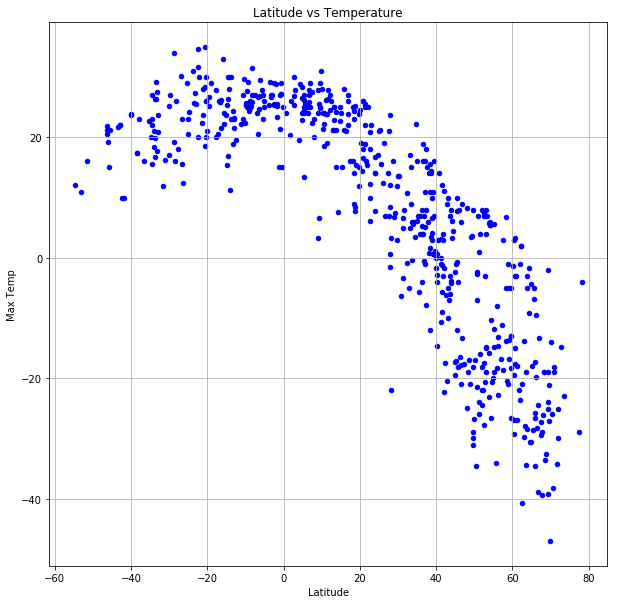

In [21]:
#Latitude vs Max Temperature
lat_temp = weather_data_df.plot.scatter(x= 'Latitude', y= 'Max Temp', c= 'Blue', grid=True, figsize=(10,10), title= "Latitude vs Temperature")                                        
lat_temp.set(xlabel='Latitude', ylabel='Max Temp')

plt.savefig("C:\\Users\\Owner\\Documents\\Data Science Bootcamp\\Homework\\latitudetemp.png")
plt.show()

#### Latitude vs. Humidity Plot

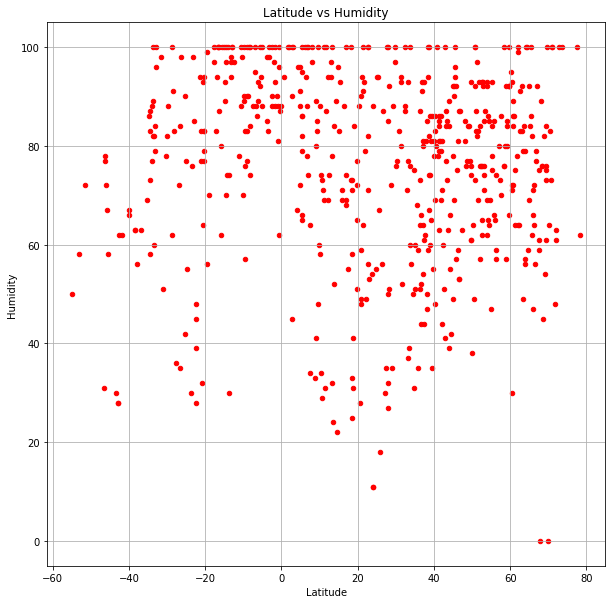

In [13]:
#latitude vs Humidity 
lat_humidity = weather_data_df.plot.scatter(x= 'Latitude', y= 'Humidity', c= 'Red', grid=True, figsize=(10,10), title= "Latitude vs Humidity")                                        
lat_humidity.set(xlabel='Latitude', ylabel='Humidity')

plt.savefig("C:\\Users\\Owner\\Documents\\Data Science Bootcamp\\Homework\\latitudehumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

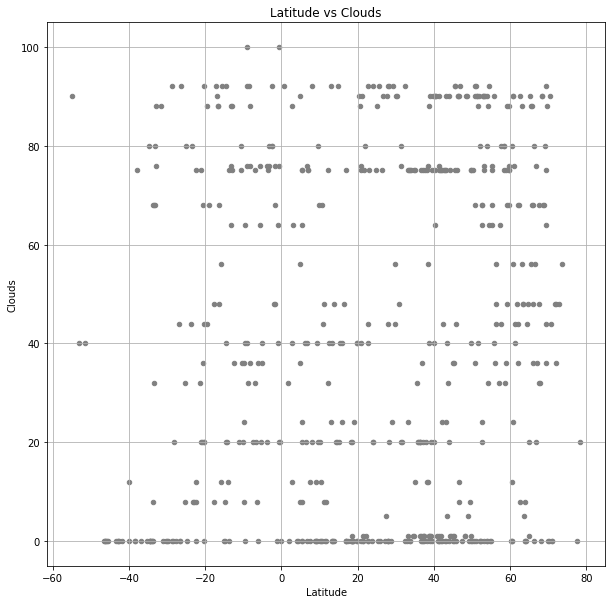

In [16]:
#Latitude vs. Cloudiness
lat_clouds = weather_data_df.plot.scatter(x= 'Latitude', y= 'Clouds', c= 'Grey', grid=True, figsize=(10,10), title= "Latitude vs Clouds")                                        
lat_clouds.set(xlabel='Latitude', ylabel='Clouds')

plt.savefig("C:\\Users\\Owner\\Documents\\Data Science Bootcamp\\Homework\\latitudeclouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

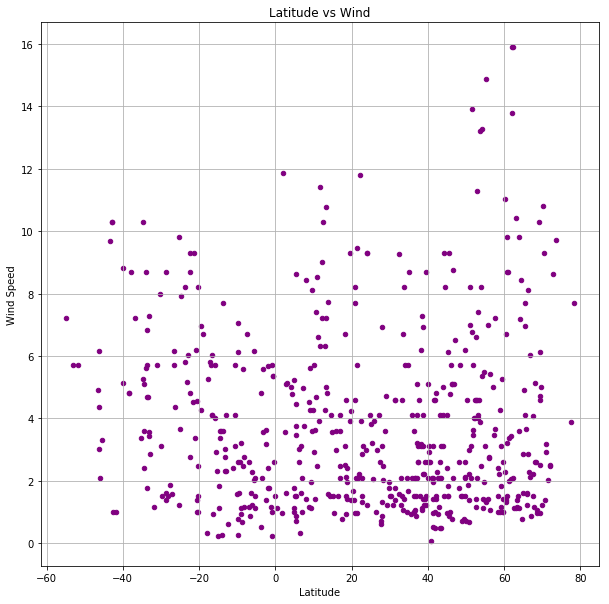

In [18]:
#Latitude vs Wind Speed
lat_wind = weather_data_df.plot.scatter(x= 'Latitude', y= 'Wind Speed', c= 'Purple', grid=True, figsize=(10,10), title= "Latitude vs Wind")                                        
lat_wind.set(xlabel='Latitude', ylabel='Wind Speed')

plt.savefig("C:\\Users\\Owner\\Documents\\Data Science Bootcamp\\Homework\\latitudewind.png")
plt.show()